# Import Dependencies

In [120]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Data preprocessing

## Read the dataset

In [74]:
dataset = pandas.read_csv('auto-mpg.csv')
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [76]:
dataset.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


## Get necessary features



In [77]:
dataset.drop(['acceleration', 'origin', 'car name'], axis=1, inplace=True)
dataset = dataset[dataset['horsepower'] != '?']
dataset['horsepower'] = dataset['horsepower'].astype(float)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   model year    392 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 21.4 KB


## Get data where model year from 1975 to 1985

In [78]:
dataset = dataset[(dataset['model year'] >= 75) & (dataset['model year'] < 85)]
# Reset the index
dataset.reset_index(drop=True, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           242 non-null    float64
 1   cylinders     242 non-null    int64  
 2   displacement  242 non-null    float64
 3   horsepower    242 non-null    float64
 4   weight        242 non-null    int64  
 5   model year    242 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 11.5 KB


# EDA


## Visualize cleaned data

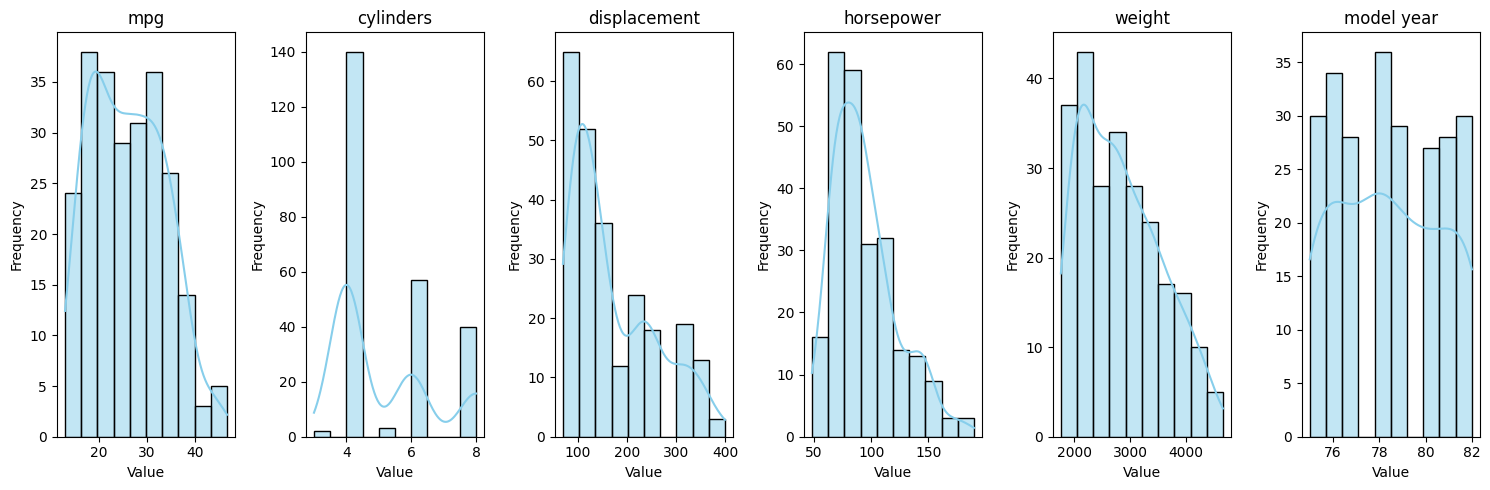

In [79]:
# Set the number of features
num_features = dataset.select_dtypes(include='number').shape[1]

# Create a single figure with a grid layout
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(15, 5))

# Plotting the distribution for each feature in smaller axes
for i, column in enumerate(dataset.select_dtypes(include='number').columns):
    sns.histplot(dataset[column], bins=10, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Visualize the correlation

<Axes: >

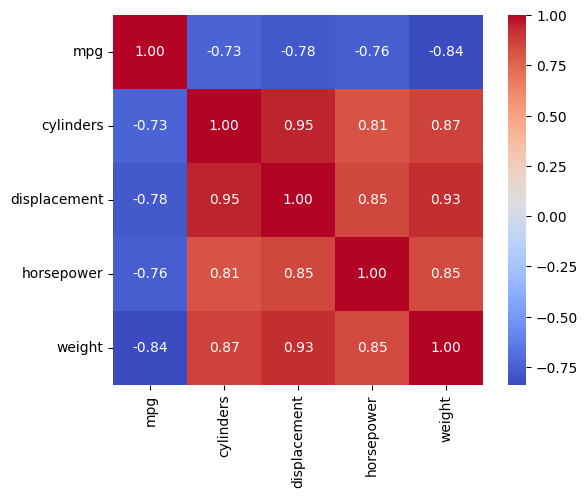

In [83]:
dataset = dataset.drop(columns=['model year'])
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Dataset Processing

## Dataset 1: Original Values

In [84]:
dataset1 = dataset.copy()
dataset1.drop(['mpg'], axis=1, inplace=True)
dataset1['mpg'] = dataset['mpg']
dataset1.head(5)

,cylinders,displacement,horsepower,weight,mpg
0,6,225.0,95.0,3264,19.0
1,6,250.0,105.0,3459,18.0
2,6,250.0,72.0,3432,15.0
3,6,250.0,72.0,3158,15.0
4,8,400.0,170.0,4668,16.0


## Dataset 2: Normalize the data

In [85]:
dataset2 = dataset.copy()
dataset2.drop(['mpg'], axis=1, inplace=True)
features = dataset2[dataset2.columns]
DatasetScaler = StandardScaler()
DatasetScaler.fit(features.values)
features = DatasetScaler.transform(features.values)
dataset2 = pandas.DataFrame(features, columns = dataset2.columns)
dataset2['mpg'] = dataset['mpg']
dataset2.head(5)

,cylinders,displacement,horsepower,weight,mpg
0,0.567480,0.633024,0.036719,0.597808,19.0
1,0.567480,0.927556,0.393587,0.867616,18.0
2,0.567480,0.927556,-0.784076,0.830258,15.0
3,0.567480,0.927556,-0.784076,0.451143,15.0
4,1.881645,2.694748,2.713226,2.540424,16.0


## Dataset 3: Scale the dataset

In [86]:
dataset3 = dataset.copy()
dataset3.drop(['mpg'], axis=1, inplace=True)
features = dataset3[dataset3.columns]
DatasetScaler = MinMaxScaler()
DatasetScaler.fit(features.values)
features = DatasetScaler.transform(features.values)
dataset3 = pandas.DataFrame(features, columns = dataset3.columns)
dataset3['mpg'] = dataset['mpg']
dataset3.head(5)

,cylinders,displacement,horsepower,weight,mpg
0,0.6,0.469697,0.330986,0.518023,19.0
1,0.6,0.545455,0.401408,0.584964,18.0
2,0.6,0.545455,0.169014,0.575695,15.0
3,0.6,0.545455,0.169014,0.481634,15.0
4,1.0,1.000000,0.859155,1.000000,16.0


# Linear Regression with Keras

# Define the model

In [137]:
def LinearRegression(inputs):
  linear_regression_model = keras.Sequential([
    keras.layers.Input(shape=(inputs.shape[1],)),
    keras.layers.Dense(units=1)
  ])

  return linear_regression_model

## Define Hyperparameter

In [138]:
LOSS_FUNCTION='mean_squared_error'
OPTIMIZER='adam'
EPOCHS=250
BATCH_SIZE=12
VALIDATION_SPLIT=0.3

## Dataset 1

In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset1.drop(columns=['mpg']), dataset1['mpg'], test_size=0.3, random_state=1) # 70% training and


In [140]:
model1 = LinearRegression(X_train)
model1.compile(optimizer=OPTIMIZER, loss=LOSS_FUNCTION)

In [141]:
history = model1.fit(X_train,Y_train,epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE)

Epoch 1/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 126956.2734 - val_loss: 131432.7031
Epoch 2/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 104886.3359 - val_loss: 108218.0234
Epoch 3/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 88910.2891 - val_loss: 87864.8125
Epoch 4/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71885.5859 - val_loss: 70411.3672
Epoch 5/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 52963.8672 - val_loss: 55798.9805
Epoch 6/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 44981.8320 - val_loss: 43556.0938
Epoch 7/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34995.2500 - val_loss: 33753.1680
Epoch 8/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26357.0391 - val_loss: 25784.6328
Epoch 9/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21921.6602 - val_loss: 19364.8320
Epoch 10/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16180.8506 - val_loss: 14457.5801
Epoch 11/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1276

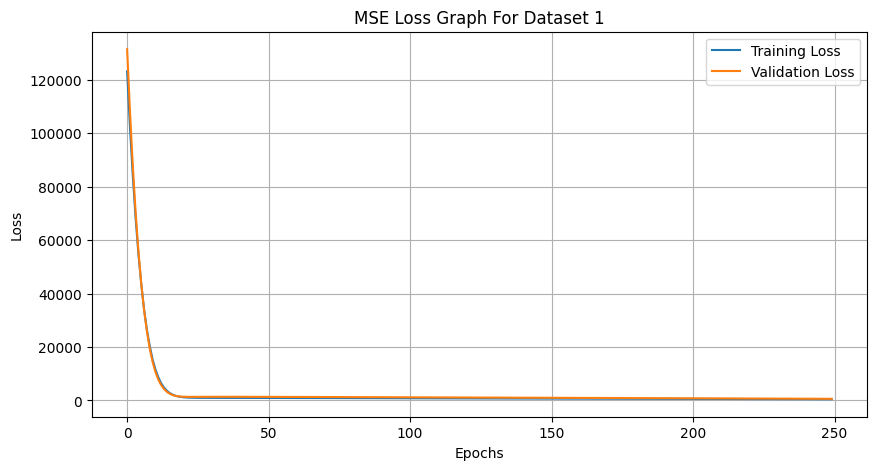

In [142]:
# Plotting the loss graph
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MSE Loss Graph For Dataset 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [143]:
print(X_test.shape)
Y_predict = model1.predict(X_test)
print(mean_squared_error(Y_test, Y_predict) / X_test.shape[0])

(73, 4)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5.925593161623913


## Dataset 2

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset2.drop(columns=['mpg']), dataset2['mpg'], test_size=0.3, random_state=1) # 70% training and

In [145]:
model2 = LinearRegression(X_train)
model2.compile(optimizer=OPTIMIZER, loss=LOSS_FUNCTION)
history = model2.fit(X_train,Y_train,epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE)

Epoch 1/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 851.7933 - val_loss: 674.4732
Epoch 2/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 828.4318 - val_loss: 673.8063
Epoch 3/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 821.8687 - val_loss: 673.1521
Epoch 4/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 825.0911 - val_loss: 672.4868
Epoch 5/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 856.4465 - val_loss: 671.8365
Epoch 6/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 810.6400 - val_loss: 671.1840
Epoch 7/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 740.5702 - val_loss: 670.5475
Epoch 8/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 786.5085 - val_loss: 669.9020
Epoch 9/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 800.8360 - val_loss: 669.2612
Epoch 10/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 767.2195 - val_loss: 668.6245
Epoch 11/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 782.1244 - val_loss: 667.9717
Epoch 12/250
10/10

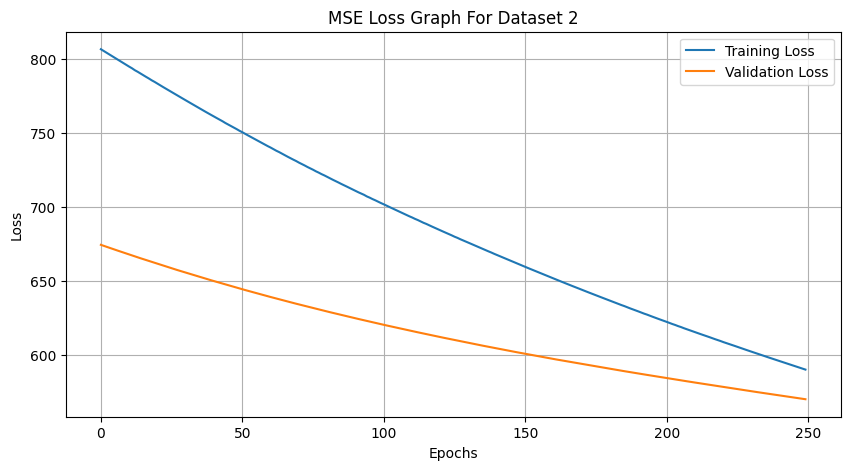

In [146]:
# Plotting the loss graph
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MSE Loss Graph For Dataset 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [147]:
print(X_test.shape)
Y_predict = model2.predict(X_test)
print(mean_squared_error(Y_test, Y_predict) / X_test.shape[0])

(73, 4)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7.90580009407693


## Dataset 3

In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset3.drop(columns=['mpg']), dataset3['mpg'], test_size=0.3, random_state=1) # 70% training and
model3 = LinearRegression(X_train)
model3.compile(optimizer=OPTIMIZER, loss=LOSS_FUNCTION)
history = model3.fit(X_train,Y_train,epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE)

Epoch 1/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 772.7191 - val_loss: 634.2819
Epoch 2/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 730.1404 - val_loss: 633.1740
Epoch 3/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 753.1129 - val_loss: 632.0659
Epoch 4/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 778.3276 - val_loss: 630.9583
Epoch 5/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 700.5386 - val_loss: 629.8528
Epoch 6/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 679.2501 - val_loss: 628.7477
Epoch 7/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 732.5652 - val_loss: 627.6522
Epoch 8/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 724.9818 - val_loss: 626.5512
Epoch 9/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 752.9181 - val_loss: 625.4560
Epoch 10/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 720.1641 - val_loss: 624.3620
Epoch 11/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 704.4724 - val_loss: 623.2711
Epoch 12/250
10

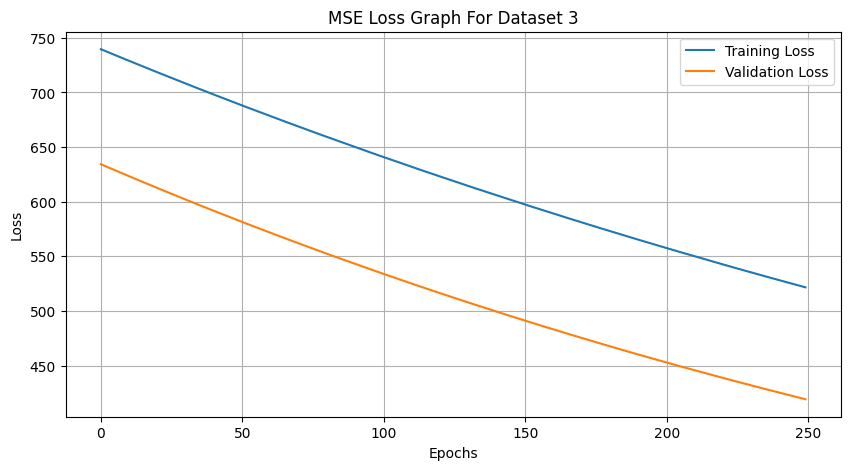

In [149]:
# Plotting the loss graph
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MSE Loss Graph For Dataset 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [150]:
print(X_test.shape)
Y_predict = model3.predict(X_test)
print(mean_squared_error(Y_test, Y_predict) / X_test.shape[0])

(73, 4)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 
6.564293926736172
